In [49]:
import pandas as pd
from wordcloud import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

Importamos los archivos provistos para comenzar el EDA

In [2]:
coursera_cursos = pd.read_csv('Coursera_courses.csv')

In [3]:
coursera_reviwes = pd.read_csv('Coursera_reviews.csv')

In [4]:
edx = pd.read_csv('edx_courses.csv')

In [5]:
udemy = pd.read_csv('udemy_courses.csv')

Realizo una copia de cada dataframe para no perder la informacion origianl

In [6]:
coursera_cursos_copy= coursera_cursos


In [7]:
coursera_reviwes_copy = coursera_reviwes


In [8]:
edx_copy = edx
udemy_copy = udemy

Comenzamos con el ETL

In [9]:
#Verificamos los tipos de datos del dataset
coursera_cursos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [10]:
coursera_cursos_copy.head()
len(coursera_cursos_copy)

623

In [11]:
#Verificamos la cantidad de nulos en el dataset
coursera_cursos_copy.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [12]:
#Verificamos los tipos de datos del datasep
coursera_reviwes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [13]:
coursera_reviwes_copy.head(10)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
5,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training
6,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
7,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
8,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
9,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training


In [14]:
#Utilizo la funcion to_datetime, para cambiar el tipo de dato de objeto a date de la columna
coursera_reviwes_copy['date_reviews'] = pd.to_datetime(coursera_reviwes_copy['date_reviews'])

In [15]:
#Creo una neuva columna llamda fecha y con la funcion dt.date optenemos solo el anio de la columna original "date_reviews"
coursera_reviwes_copy['fecha']= coursera_reviwes_copy['date_reviews'].dt.date
coursera_reviwes_copy['fecha'] = pd.to_datetime(coursera_reviwes_copy['fecha'])

In [16]:
#Creo una neuva columna llamda hora y con la funcion dt.time optenemos solo el horario de la columna original "date_reviews"
coursera_reviwes_copy['hora']= coursera_reviwes_copy['date_reviews'].dt.time

In [17]:
coursera_reviwes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   reviews       1454571 non-null  object        
 1   reviewers     1454711 non-null  object        
 2   date_reviews  1454711 non-null  datetime64[ns]
 3   rating        1454711 non-null  int64         
 4   course_id     1454711 non-null  object        
 5   fecha         1454711 non-null  datetime64[ns]
 6   hora          1454711 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 77.7+ MB


In [18]:
coursera_reviwes_copy.head(10)

,reviews,reviewers,date_reviews,rating,course_id,fecha,hora
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020-02-12,00:00:00
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020-09-28,00:00:00
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020-04-08,00:00:00
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,2020-02-24,00:00:00
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,2020-06-18,00:00:00
5,Some of the quizzes contained material not exp...,By Daniel F,2019-12-23,4,google-cbrs-cpi-training,2019-12-23,00:00:00
6,Solid presentation all the way through. I real...,By Logan D,2020-09-03,5,google-cbrs-cpi-training,2020-09-03,00:00:00
7,Probably the best certification course I've ta...,By Luis M C,2019-11-21,5,google-cbrs-cpi-training,2019-11-21,00:00:00
8,The ProctorU.com system took 2 times the amoun...,By scott w,2020-09-28,5,google-cbrs-cpi-training,2020-09-28,00:00:00
9,Covered all of the required information in an ...,By Ryan H,2019-08-26,5,google-cbrs-cpi-training,2019-08-26,00:00:00


In [19]:
coursera_reviwes_copy.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
fecha             0
hora              0
dtype: int64

In [ ]:
coursera_reviwes_copy.drop_duplicates(inplace=True)

In [ ]:
#Completamos los vacios con 
coursera_reviwes_copy = coursera_reviwes_copy.fillna({'reviews':'Sin dato al momento de la carga'})

In [22]:
coursera_reviwes_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   reviews       519947 non-null  object        
 1   reviewers     519947 non-null  object        
 2   date_reviews  519947 non-null  datetime64[ns]
 3   rating        519947 non-null  int64         
 4   course_id     519947 non-null  object        
 5   fecha         519947 non-null  datetime64[ns]
 6   hora          519947 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 31.7+ MB


In [23]:
coursera_reviwes_copy.isnull().sum()

reviews         0
reviewers       0
date_reviews    0
rating          0
course_id       0
fecha           0
hora            0
dtype: int64

In [24]:
edx_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [25]:
edx_copy.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [26]:
edx_copy.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [27]:
#Borro las columnas ya que para el estudio no seran necesarias ya que no aportan informacion relvante
edx_copy = edx_copy.drop(columns=['course_syllabus','course_description','course_url'])

In [28]:
#vemos como queda nuestro dataset
edx_copy.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD


In [29]:
udemy_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [30]:
udemy_copy.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [31]:
#Utilizo la funcion to_datetime para cambiar el tipo de dato de la columna de objeto a date
udemy_copy['published_timestamp'] = pd.to_datetime(udemy_copy['published_timestamp'])

In [ ]:
#utilizo la funcion dt.date para quedarme solo con el anio de la columna original "Published_timestanp"
udemy_copy['fecha']= udemy_copy['published_timestamp'].dt.date


In [33]:
udemy_copy.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,fecha
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13


In [34]:
#Reemplazo los valores del 0 al 9 con espacios vacios ya que al cargarlo en power bi note que habia datos enteros en la columna
udemy_copy['level'] = udemy_copy['level'].str.replace("[0-9]", "")

C:\Users\lucas\AppData\Local\Temp\ipykernel_7648\888404642.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  udemy_copy['level'] = udemy_copy['level'].str.replace("[0-9]", "")


In [35]:
udemy_copy.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,fecha
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13


In [36]:
# le damos formato entero a price y formato string a level
udemy_copy['price'] = udemy_copy['price'].astype(int)
udemy_copy['level'] = udemy_copy['level'].astype(str)

In [37]:
#Borro la columna URL ya que para la evaluacion no nos daba ningun tipo de informacion 
udemy_copy = udemy_copy.drop(columns=['url'])

In [38]:
udemy_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   is_paid              3678 non-null   bool               
 3   price                3678 non-null   int32              
 4   num_subscribers      3678 non-null   int64              
 5   num_reviews          3678 non-null   int64              
 6   num_lectures         3678 non-null   int64              
 7   level                3678 non-null   object             
 8   content_duration     3678 non-null   float64            
 9   published_timestamp  3678 non-null   datetime64[ns, UTC]
 10  subject              3678 non-null   object             
 11  fecha                3678 non-null   object             
dtypes: bool(1), datetime

In [77]:
#Exporto los dataframe con las modificaciones para luego cargarlas en power bi
coursera_cursos_copy = pd.DataFrame(coursera_cursos_copy)
coursera_cursos_copy.to_csv('coursera_cursos_copy.csv', index=False)

In [76]:
#Exporto los dataframe con las modificaciones para luego cargarlas en power bi
coursera_reviwes_copy = pd.DataFrame(coursera_reviwes_copy)
coursera_reviwes_copy.to_csv('coursera_reviwes_copy.csv', index=False)

In [78]:
#Exporto los dataframe con las modificaciones para luego cargarlas en power bi
edx_copy = pd.DataFrame(edx_copy)
edx_copy.to_csv('edx_copy.csv', index=False)

In [79]:
#Exporto los dataframe con las modificaciones para luego cargarlas en power bi
udemy_copy = pd.DataFrame(udemy_copy)
udemy_copy.to_csv('udemy_copy.csv',index=False)

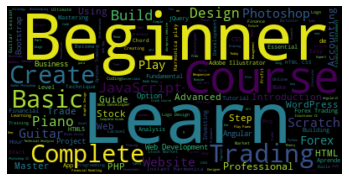

In [50]:
#Utilizamos la libreria WordCloud para generar una nuve de palabras en la columna course_title

text = ' '.join(udemy_copy['course_title'].tolist())

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

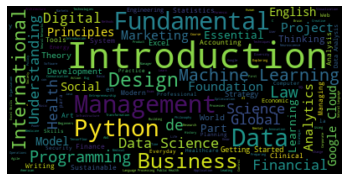

In [51]:
#Utilizamos la libreria WordCloud para generar una nuve de palabras en la columna Name 
text = ' '.join(coursera_cursos_copy['name'].tolist())

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

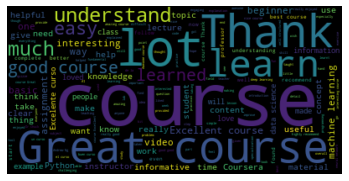

In [52]:
#Utilizamos la libreria WordCloud para generar una nuve de palabras en la columna Reviews
text = ' '.join(coursera_reviwes_copy['reviews'].tolist())

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

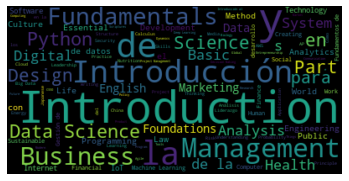

In [53]:
#Utilizamos la libreria WordCloud para generar una nuve de palabras en la columna Title
text = ' '.join(edx['title'].tolist())

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Modificaciones e implementaciones Realizadas en Power BI

#                     UDEMY
Al cargar el dataset en power bi se utilizo la primera fila como encabezados.
#Realize es medida para calcular el monto facturado total
Medida - Precio_cant_Subscriptores = udemy_copy[price]*udemy_copy[num_subscribers]
#Se realizaron los filtros por anio para poder mostrar como iban incrementando o bajando la cantidad de subscriptores
Medida - filtro_anio_2011 = IF(udemy_copy[Columna_anio] == 2011, udemy_copy[num_subscribers],0)
Medida - filtro_anio_2016 = IF(udemy_copy[Columna_anio] == 2011, udemy_copy[num_subscribers],0)
Medida - filtro_anio_2017 = IF(udemy_copy[Columna_anio] == 2011, udemy_copy[num_subscribers],0)
#                      EDX
Al cargar el dataset en power bi se utilizo la primera fila como encabezados.
Dentro de power query utilizo la funcion Text.Select([price],{"0".."9"})) para tomar solo la parte entera de price ya que el valor de la certificacion estaba al final de la columna
Creo una nueva columna llamada n_enrolled-copy ya que necesitaba reemplazar las , por . para poder pasar los valores a enteros 
#Realize la medida Precio_cant_enrolled para multiplicar el valor de la certifiacion contra la cantidad de subscriptos
Medida - Precio_cant_enrolled = edx_copy[Precio]*edx_copy[n_enrolled - Copia]
#                    Coursera_Reviews
Al cargar el dataset en power bi se utilizo la primera fila como encabezados.
Se crea la columna costo que es el valor de la cuota anual.
Se crea una nueva columna llamada Filtro_Por_Rating utilizando un if creamos un escala donde 5 es Muy bueno y 1 es muy malo.
Filtro_por_rating = 
IF(coursera_reviwes_copy[rating]<=1,"Muy malo",
IF(coursera_reviwes_copy[rating] = 2, "Malo",
IF(coursera_reviwes_copy[rating] = 3, "Regular",
IF(coursera_reviwes_copy[rating] = 4, "Bueno",
IF(coursera_reviwes_copy[rating] = 5, "Muy bueno",
"Sin Ranking")))))

#Creo las medida Cantidad_De_Cursos con la funcion distinctcount para sumar los valores unicos
Medida - Cantidad_de_cursos = DISTINCTCOUNT(coursera_cursos_copy[course_id])
#Creo las medida cantidad_de_filtro_rating con la funcion distinctcount para sumar los valores 
Medida - cantidad_de_filtro_rating = COUNT(coursera_reviwes_copy[Filtro_por_rating])
#Creo las medida Cantidad_de_instituciones  con la funcion distinctcount para sumar los valores unicos
Medida - Cantidad_de_instituciones = DISTINCTCOUNT(coursera_cursos_copy[institution])
#                    Coursera_Cursos
Al cargar el dataset en power bi se utilizo la primera fila como encabezados.







